In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact

One-dimensional chain of $N$ particles each of mass $m$. Particles coupled with massless springs with force constant $k$. The equilibrium separation between particles is $a$.

$$ m \frac{d^2u_j(t)}{dt^2} = - k \left[ 2 u_j(t) - u_{j+1}(t) - u_{j-1}(t) \right]$$

## Normal modes and fixed boundary conditions


$$\begin{align}
u_0(t) &= 0\\
u_{N+1}(t) &= 0
\end{align}$$

In [198]:
N = 10          # number of particles
L = 1           # distance between end points
a = L/(N+1)     # distance between particles
k = 1           # spring constant
m = 1           # particle mass
tmax = 200

Coordinate system for the particles (including end points)

In [199]:
J = np.arange(N+2)
x = a*J

Initial condition

$$ u(t=0) = \sin(n \pi x / L) $$

for a normal mode of order $n$

In [200]:
n = 2
u0 = np.sin(n*np.pi * x / L)
v0 = np.zeros(N+2)

In [201]:
y0 = np.hstack([u0, v0])

In [202]:
def fixed_bc(t, y, k, m):
    
    N = len(y)//2 - 2
    
    u = y[:N+2]
    v = y[N+2:]

    dudt = np.zeros(N+2)
    dvdt = np.zeros(N+2)
    
    for j in range(1, N+1):
        dudt[j] = v[j]
        dvdt[j] = -k/m * (2*u[j] - u[j-1] - u[j+1])
    
    return np.hstack([dudt, dvdt])

Solve numerically

In [203]:
sol = solve_ivp(fixed_bc,         # fun
            [0, tmax],           # t_span
            y0,               # y0 
            args=(k, m),   # arguments
            dense_output=True # return a continuous function
           ) 

In [204]:
@interact(t=(0, tmax, 1), n=(1, 20))
def plot(t=0, n = 1):
    
    y = sol.sol(t)
    u = y[:N+2]
    v = y[N+2:]

    plt.plot(x, u, 'o-')
    plt.xlabel('x')
    
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='t', max=200), IntSlider(value=1, description='n', max=20…

Investigate modes and number of particles

In [205]:
@interact(t=(0, tmax, 1), n=(1, 20), N=(1, 50))
def simulate(t=0, n=1, N=10):
    
    L = 1           # distance between end points
    a = L/(N+1)     # distance between particles
    k = 1           # spring constant
    m = 1           # particle mass
    
    J = np.arange(N+2)
    x = a*J
    
    u0 = np.sin(n*np.pi * x / L)
    v0 = np.zeros(N+2)
    y0 = np.hstack([u0, v0])
    
    sol = solve_ivp(fixed_bc,         # fun
            [0, tmax],           # t_span
            y0,               # y0 
            args=(k, m),   # arguments
            dense_output=True # return a continuous function
           ) 
    
    y = sol.sol(t)
    u = y[:N+2]
    v = y[N+2:]

    plt.plot(x, u, 'o-')
    plt.xlabel('x')
    
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='t', max=200), IntSlider(value=1, description='n', max=20…

## Periodic boundary conditions



$$\begin{align}
u_0 &= u_N \\
u_1 &= u_{N+1}
\end{align}$$

In [206]:
def periodic_bc(t, y, k, m):
    
    N = len(y)//2 - 2
    
    u = y[:N+2]
    v = y[N+2:]

    dudt = np.zeros(N+2)
    dvdt = np.zeros(N+2)
    
    for j in range(1, N+1):
        dudt[j] = v[j]
        dvdt[j] = -k/m * (2*u[j] - u[j-1] - u[j+1])
        
    dudt[0] = dudt[N]
    dvdt[0] = dvdt[N]
    dudt[N+1] = dudt[1]
    dvdt[N+1] = dvdt[1]
    
    return np.hstack([dudt, dvdt])

In [207]:
@interact(t=(0, tmax, 1), n=(1, 20), N=(1, 50))
def simulate(t=0, n=2, N=10):
    
    L = 1           # distance between end points
    a = L/(N)       # distance between particles
    k = 1           # spring constant
    m = 1           # particle mass
    tmax = 100
    
    J = np.arange(N+2)
    x = a*J
    
    u0 = np.cos(n*np.pi * x / L)
    v0 = np.zeros(N+2)
    y0 = np.hstack([u0, v0])
    
    sol = solve_ivp(periodic_bc,         # fun
            [0, tmax],           # t_span
            y0,               # y0 
            args=(k, m),   # arguments
            dense_output=True # return a continuous function
           ) 
    
    y = sol.sol(t)
    u = y[:N+2]
    v = y[N+2:]

    plt.plot(x, u, 'o-')
    plt.plot(x[-2:], u[-2:], 'o-')
    plt.xlabel('x')
    
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='t', max=200), IntSlider(value=2, description='n', max=20…

## Free boundary conditions

In [213]:
def free_bc(t, y, k, m):
    
    N = len(y)//2 - 2
    
    u = y[:N+2]
    v = y[N+2:]

    dudt = np.zeros(N+2)
    dvdt = np.zeros(N+2)
    
    for j in range(1, N+1):
        dudt[j] = v[j]
        dvdt[j] = -k/m * (2*u[j] - u[j-1] - u[j+1])
        
    dudt[0] = dudt[1]
    dvdt[0] = dvdt[1]
    dudt[N+1] = dudt[N]
    dvdt[N+1] = dvdt[N]
    
    return np.hstack([dudt, dvdt])

In [214]:
@interact(t=(0, tmax, 1), n=(1, 20), N=(9, 100, 2))
def simulate(t=0, n=2, N=50, pulse=False):
    
    L = 1           # distance between end points
    a = L/(N+1)       # distance between particles
    k = 1           # spring constant
    m = 1           # particle mass
    
    J = np.arange(N+2)
    x = a*J
    
    u0 = np.zeros(N+2)
    v0 = np.zeros(N+2)
    
    if pulse:

        u0[N//2-1] = 0.2
        u0[N//2+0] = 0.6
        u0[N//2+1] = 1.0
        u0[N//2+2] = 0.6
        u0[N//2+3] = 0.2
        
     ##   for i in range(N//2-2, N//2+3):
     #       v0[i] = -a**2*(u0[i+1] - u0[i-1])/(2*a)
    else:
        u0 = np.cos(n*np.pi * x / L)
        u0[0] = u0[1]
        u0[N+1] = u0[N]
    
    y0 = np.hstack([u0, v0])
    
    sol = solve_ivp(free_bc,         # fun
            [0, tmax],           # t_span
            y0,               # y0 
            args=(k, m),   # arguments
            dense_output=True # return a continuous function
           ) 
    
    y = sol.sol(t)
    u = y[:N+2]
    v = y[N+2:]

    plt.plot(x, u, 'o-')
    plt.xlabel('x')
    
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='t', max=200), IntSlider(value=2, description='n', max=20…

## Forced boundary condition

In [250]:
def forced_bc(t, y, k, m, A, ω):
    
    N = len(y)//2 - 2
    
    u = y[:N+2]
    v = y[N+2:]

    dudt = np.zeros(N+2)
    dvdt = np.zeros(N+2)
    
    for j in range(1, N+1):
        dudt[j] = v[j]
        dvdt[j] = -k/m * (2*u[j] - u[j-1] - u[j+1])
        
    dudt[0] = ω*A*np.cos(ω*t)
    dvdt[0] = -ω**2*A*np.sin(ω*t)
    
    return np.hstack([dudt, dvdt])

In [257]:
tmax=100

@interact(t=(0, tmax, 1), ω=(0, 3, 0.05))
def simulate(t=0, ω=1.0):
    
    N = 500
    A = 1
    L = 0.2           # distance between end points
    a = L/(N+1)       # distance between particles
    k = 1         # spring constant
    m = 1           # particle mass

    J = np.arange(N+2)
    x = a*J
    
    u0 = np.zeros(N+2)
    v0 = np.zeros(N+2)
    y0 = np.hstack([u0, v0])
    
    sol = solve_ivp(forced_bc,         # fun
            [0, tmax],           # t_span
            y0,               # y0 
            args=(k, m, A, ω),   # arguments
            dense_output=True # return a continuous function
           ) 
    
    y = sol.sol(t)
    u = y[:N+2]
    v = y[N+2:]

    plt.plot(x, u, '-')
    plt.xlabel('x')
    
    plt.ylim(-1, 1)

interactive(children=(IntSlider(value=0, description='t'), FloatSlider(value=1.0, description='ω', max=3.0, st…

# 9.7 Wave Motion

$$ m \frac{d^2u_j(t)}{dt^2} = - k \left[ 2 u_j(t) - u_{j+1}(t) - u_{j-1}(t) \right]$$

Take the limit as $N \rightarrow \infty$ and $a \rightarrow 0$. This will lead to the *wave equation*

$$ \frac{\partial^2 u(x, t)}{\partial t^2} = - c^2 \frac{\partial^2 u(x,t)}{\partial x^2}$$

where $c$ has the dimension of velocity.

See textbook for derivation.

We can solve the wave equation numerically by converting the PDE into a finite difference equation.

$$\frac{1}{(\Delta t)^2} [ u(x, t+\Delta t) - 2 u(x, t) + u(t, t-\Delta t)] = \frac{c^2}{(\Delta x)^2} [u(x+\Delta x, t) - 2u(x,t) + u(x-\Delta x, t)] $$

Solving for $u(x, t+\Delta t)$ gives

$$u(x, t+\Delta t) = 2(1-b) u(x, t) + b[u(x-\Delta x, t) + u(x+\Delta x, t)] - u(x, t-\Delta t)$$

where $b = (c \Delta t / \Delta x)^2$.

We will need to store the values of $u(x)$ at three different times: $t + \Delta t$, $t$, and $t-\Delta t$.

In [261]:
u = np.arange(5)
u

array([0, 1, 2, 3, 4])

In [266]:
np.roll(u, -1)

array([1, 2, 3, 4, 0])

In [348]:
N = 200

dx = 1
dt = 1
c = 1
b = (c*dt/dx)**2

x = np.arange(0, N*dx, dx)

u_old = np.exp(-(x - 10 + c*dt)**2)
u = np.exp(-(x - 10)**2)

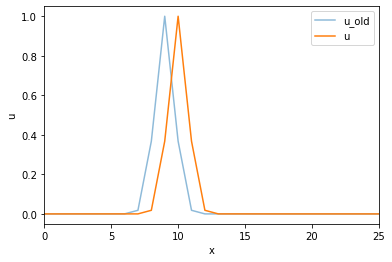

In [349]:
plt.plot(x, u_old, alpha=0.5, label='u_old')
plt.plot(x, u, label='u')

plt.legend()
plt.ylabel('u')
plt.xlabel('x')
plt.xlim(0, 25)
plt.show()

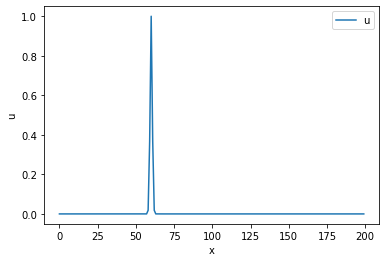

In [354]:
tmax = 10
t = 0
while t < tmax:
    u_new = 2*(1-b)*u + b*(np.roll(u, 1) + np.roll(u, -1)) - u_old
    
    u_old = u
    u = u_new
    
    t += dt

plt.plot(x, u, label='u')

plt.legend()
plt.ylabel('u')
plt.xlabel('x')
plt.show()

In [360]:
@interact(tmax=(0, 200))
def simulate(tmax=0):
    N = 50

    dx = 1
    dt = 1
    c = 1
    b = (c*dt/dx)**2

    x = np.arange(0, N*dx, dx)
    u0 = np.exp(-(x - 10)**2)

    u_old = np.exp(-(x - 10 + c*dt)**2)
    u = np.exp(-(x - 10)**2)

    t = 0
    while t < tmax:
        u_new = 2*(1-b)*u + b*(np.roll(u, 1) + np.roll(u, -1)) - u_old

        u_old = u
        u = u_new

        t += dt

    plt.plot(x, u0, '--', label='u')
    plt.plot(x, u, label='u')

    plt.legend()
    plt.ylabel('u')
    plt.xlabel('x')


interactive(children=(IntSlider(value=0, description='tmax', max=200), Output()), _dom_classes=('widget-intera…

In [379]:
@interact(tmax=(0, 200))
def simulate(tmax=0):
    N = 50

    dx = 1
    dt = 1
    c = 1
    b = (c*dt/dx)**2

    x = np.arange(0, N*dx, dx)
    q = 2*np.pi/(N)
    ω = 1
    
    t = 0
    
    u0 = np.sin(q*x-ω*t)

    u_old = np.sin(q*(x+c*dt)-ω*t )
    u = np.sin(q*x-ω*t)

    while t < tmax:
        u_new = (np.roll(u, 1) + np.roll(u, -1)) - u_old

        u_old = u
        u = u_new

        t += dt

    plt.plot(x, u0, '--', label='u')
    plt.plot(x, u, '.-', label='u')
    plt.plot([x[-1], 50], [u[-1], u[0]], '.-',)
    
    plt.legend()
    plt.ylabel('u')
    plt.xlabel('x')

interactive(children=(IntSlider(value=0, description='tmax', max=200), Output()), _dom_classes=('widget-intera…

In [386]:
@interact(tmax=(0, 200))
def simulate(tmax=0):
    N = 50

    dx = 1
    dt = 1
    c = 1
    b = (c*dt/dx)**2

    x = np.arange(0, N*dx, dx)
    q = 2*np.pi/(N)
    ω = 1
    
    t = 0

    u_old = np.exp(-(x - 10 + c*dt)**2) + 0.5*np.exp(-(x - 30 - c*dt)**2)
    u = np.exp(-(x - 10)**2) + 0.5*np.exp(-(x - 30)**2)

    while t < tmax:
        u_new = (np.roll(u, 1) + np.roll(u, -1)) - u_old

        u_old = u
        u = u_new

        t += dt

    plt.plot(x, u, '.-', label='u')
    plt.plot([x[-1], 50], [u[-1], u[0]], '.-',)
    
    plt.legend()
    plt.ylabel('u')
    plt.xlabel('x')
    plt.ylim(-0.1, 1.5)

interactive(children=(IntSlider(value=0, description='tmax', max=200), Output()), _dom_classes=('widget-intera…